# Задача 1

In [52]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *
%matplotlib inline

In [64]:
# Размер выборки
sz = 100
# Генерирую выборку размером sz
x = norm.rvs(size=sz)

# Модель $N(\theta,1)$

Априорное распределение - $N(\mu_0, \sigma^2_0)$ with mean$=\mu_0$, $\mu=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}$. Следовательно, ${\theta^*=\frac{\sum_{i=1}^n X_i + \frac{\mu_0}{\sigma^2_0}}{\frac{1}{\sigma^2_0} + n}}$.

In [65]:
# Здесь будут храниться выборочные средние от X
means = np.zeros(sz)
for i in range(sz):
    means[i] = x[:(i+1)].mean()

In [66]:
def BayesEst1(x, a, sigma):
    # Байесовская оценка для theta
    return float((sum(x) + (a/sigma**2))/(len(x) + (1/sigma**2)))

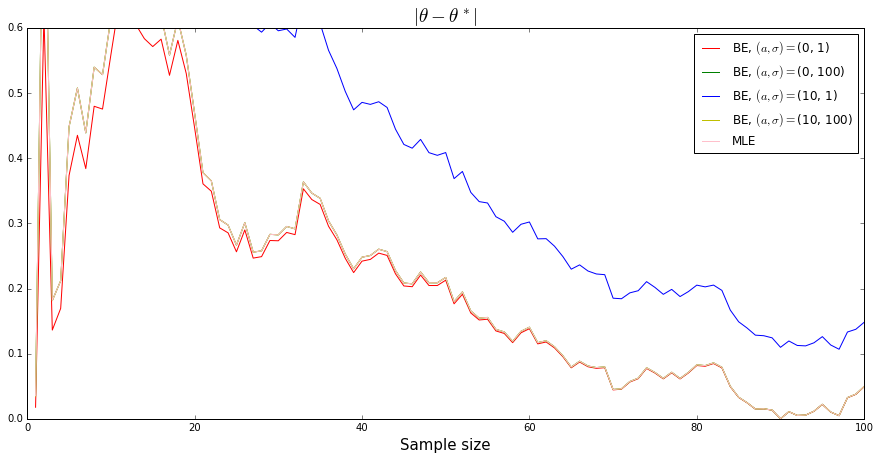

In [67]:
"""
colors - массив цветов для различных параметров априорного распределения
params - массив параметров априорного распределения
"""
colors = ['r','g','b','y','pink']
params = np.array([(0,1), (0,100), (10,1), (10,100)])
assert len(colors) == len(params)+1, "Wrong length"

"""
Строю графики для четырех параметров и для оценки максимального
правдоподобия в зависимости от размера выборки
"""
plt.figure(figsize=(15,7))
for par,col in zip(params, arange(len(params))):
    # В tmp записываю байесовские оценки, чтобы построить график
    tmp = np.array([BayesEst1(x[:(i+1)],par[0],par[1]) for i in range(sz)])
    # BE stands for 'Bayes estimator'
    plt.plot(np.arange(1,sz+1), abs(tmp), color=colors[col], \
             label='BE, $(a, \sigma)=$({}, {})'.format(par[0], par[1]))

# Строю график для ОМП
plt.plot(np.arange(1,sz+1), abs(means), color=colors[-1], label='MLE')
plt.ylim((0,0.6))
plt.xlabel('Sample size', fontsize=15)
plt.title("$|\\theta - \\theta^*|$", fontsize=19)
plt.legend()
plt.show()

Вывод: лучше всех себя показали ОМП наряду с параметрами (0,1), (0,100), (10,100) априорного распределения для оценки среднего в $N(\theta,1)$. Это зависит от выборки: на одной выборке эти параметры могут лучше всего оценивать среднее, а на другой - хуже, чем параметры (10,1) априорного распределения. Однако на первых же шагах модуль разности реального значения оцениваемого параметра и ОМП наряду с параметрами (0,1), (0,100), (10,100) априорного распределения ближе всего к нулю.

# Модель $N(0,\theta)$

Априорное распределение - Inverse-gamma Distribution $\Gamma_{inv}(\alpha_0, \beta_0)$ with mean$=\frac{\beta_0}{\alpha_0 - 1}$; ${\alpha=\alpha_0 + \frac{n}{2}, \beta=\beta_0 + \frac{\sum_{i=1}^n X_i^2}{2}}$. Следовательно, ${\theta^*=\frac{\beta}{\alpha - 1} = \frac{2\beta_0 + \sum_{i=1}^n X_i^2}{2\alpha_0 + n - 2}}$.

In [77]:
# Здесь будут храниться выборочные дисперсии
sigmas = np.zeros(sz)
for i in range(sz):
    sigmas[i] = var(x[:(i+1)])

In [78]:
def BayesEst2(x, alpha, beta):
    # Байесовская оценка для theta
    return ((2. * beta) + sum([i**2 for i in x]))/((2. * alpha) + len(x) - 2.)

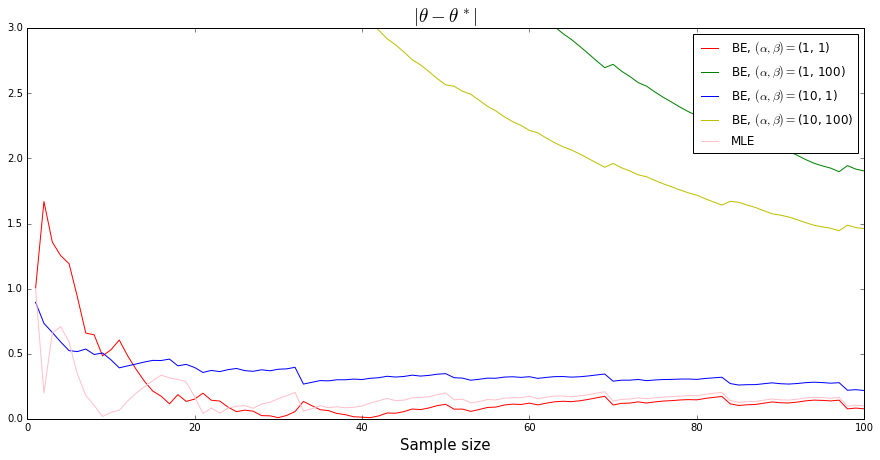

In [79]:
"""
colors - массив цветов для различных параметров априорного распределения
params - массив параметров априорного распределения
"""
colors = ['r','g','b','y','pink']
params = np.array([(1,1), (1,100), (10,1), (10,100)])
assert len(colors) == len(params)+1, "Wrong length"

"""
Строю графики для четырех параметров и для оценки максимального
правдоподобия в зависимости от размера выборки
"""
plt.figure(figsize=(15,7))
for par, col in zip(params, arange(len(params))):
    # В tmp записываю байесовские оценки, чтобы построить график
    tmp = np.array([BayesEst2(x[:(i+1)],par[0],par[1]) for i in range(sz)])
    # BE stands for 'Bayes estimator'
    plt.plot(np.arange(1,sz+1), abs(tmp-1), color=colors[col], \
             label='BE, $(\\alpha, \\beta)=$({}, {})'.format(par[0], par[1]))

# Строю график для ОМП
plt.plot(np.arange(1,sz+1), abs(sigmas-1), color=colors[-1], label='MLE')
plt.ylim((0,3))
plt.legend()
plt.xlabel('Sample size', fontsize=15)
plt.title("$|\\theta - \\theta^*|$", fontsize=19)
plt.show()

Вывод: лучше всех себя показали ОМП наряду с параметрами (1,1), (10,1) априорного распределения для оценки дисперсии в $N(0,\theta)$.